In [99]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv(r"C:\Users\Rishabh\Downloads\ML_Datasets\diabetes_prediction_dataset.zip")

In [101]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [102]:
# df.drop(columns = ['hypertension'], inplace = True )

In [103]:
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [105]:
## Ohe hot encoding

from sklearn.preprocessing import OneHotEncoder

enc_columns = ['gender','smoking_history']

ohe = OneHotEncoder(sparse_output = False)

x_encoded = ohe.fit_transform(X_train[enc_columns])

features = ohe.get_feature_names_out(enc_columns)

x_encoded  = pd.DataFrame(x_encoded,columns = features)

x_test_encoded = ohe.transform(X_test[enc_columns])
x_test_encoded = pd.DataFrame(x_test_encoded,columns = features)



In [106]:
## MERGE THE TRain and Test DF

# Train DF
X_train.reset_index(drop=True, inplace=True)
x_encoded.reset_index(drop=True, inplace=True)

X_train =pd.concat([X_train,x_encoded],axis = 1)


# TEst df
X_test.reset_index(drop=True, inplace=True)
x_test_encoded.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test,x_test_encoded],axis = 1)


In [107]:
## REMoved unwanted columns from both test and train sets
X_train = X_train.drop(columns= enc_columns)
X_test = X_test.drop(columns=enc_columns)

In [108]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,66.0,0,0,22.50,5.0,90,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,0,0,25.39,6.1,160,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,0,0,28.60,6.1,90,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,21.0,0,0,27.32,4.0,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11.0,0,0,32.28,6.6,159,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,80.0,0,0,27.63,6.6,158,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79996,21.0,0,0,27.32,6.6,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79997,4.0,0,0,16.18,6.6,130,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
79998,31.0,0,0,27.32,6.6,160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
from sklearn.feature_selection import mutual_info_classif

mi = (mutual_info_classif(X_train,y_train))*100

mi_scores = pd.DataFrame({'Features':X_train.columns,'score':mi})

In [110]:
mi_scores

,Features,score
0,age,4.087783
1,hypertension,1.314857
2,heart_disease,0.891246
3,bmi,2.532302
4,HbA1c_level,12.957620
5,blood_glucose_level,11.191114
6,gender_Female,1.200446
7,gender_Male,0.909243
8,gender_Other,0.114141
9,smoking_history_No Info,1.546118


In [111]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [112]:
# ! pip install imblearn

In [113]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)


In [114]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
# from xgboost import XGBClassifier


In [115]:
model = RandomForestClassifier(max_depth =5,n_estimators = 300, class_weight= 'balanced') 
# model = SGDClassifier(loss = 'hinge',learning_rate = 'constant', eta0=0.01,max_iter =2000,class_weight= {0:5,1:10})
# model = XGBClassifier()
model.fit(X_train,y_train) 

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=300)

In [116]:
## Check for class weights ##

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get unique class labels and their counts
classes = np.unique(y_train)

# Compute the class weights
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Convert to dictionary format
class_weights_dict = dict(zip(classes, weights))

print("Class Weights Used:", class_weights_dict)


Class Weights Used: {0: 0.5462167661236361, 1: 5.909292362239622}


In [117]:
ypred = model.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score

In [119]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18269
           1       0.51      0.89      0.65      1731

    accuracy                           0.92     20000
   macro avg       0.75      0.90      0.80     20000
weighted avg       0.95      0.92      0.93     20000



In [120]:
confusion_matrix(y_test,ypred)

array([[16787,  1482],
       [  197,  1534]], dtype=int64)

In [121]:
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [122]:
accuracy_score(y_test,ypred)*100

91.605

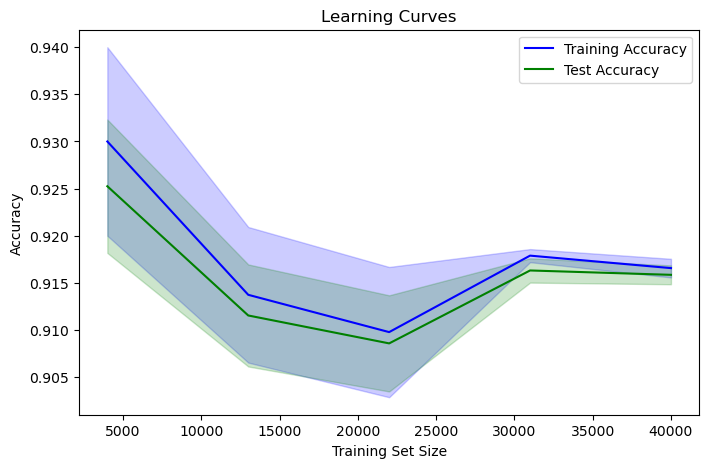

In [123]:
from sklearn.model_selection import learning_curve
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=2)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [124]:
recall_score(y_test,ypred)

0.8861929520508377

In [125]:
# sns.scatterplot(y_test,ypred)

In [126]:

X_train = np.array(X_train)
y_train = np.array(y_train)

<Axes: >

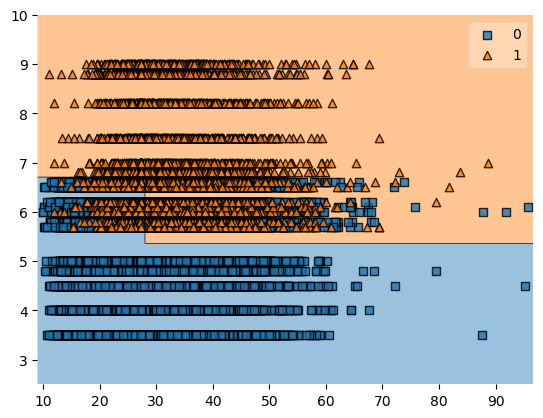

In [127]:
from mlxtend.plotting import plot_decision_regions
X_selected = X_train[:, 3:5]

model.fit(X_selected, y_train)
plot_decision_regions(X_selected, y_train, model)


In [128]:
# ! pip install shap

In [129]:
import shap

explainer = shap.TreeExplainer(model)   
shap_values = explainer.shap_values(X_test)

shap_values = explainer.shap_values(X_test )


In [130]:
print("Shape of data matrix: ", X_test.shape)
print("Shape of SHAP values matrix: ", shap_values.shape)


Shape of data matrix:  (20000, 15)
Shape of SHAP values matrix:  (20000, 15, 2)


In [131]:
# shap.dependence_plot(0, shap_values[1], X_test)

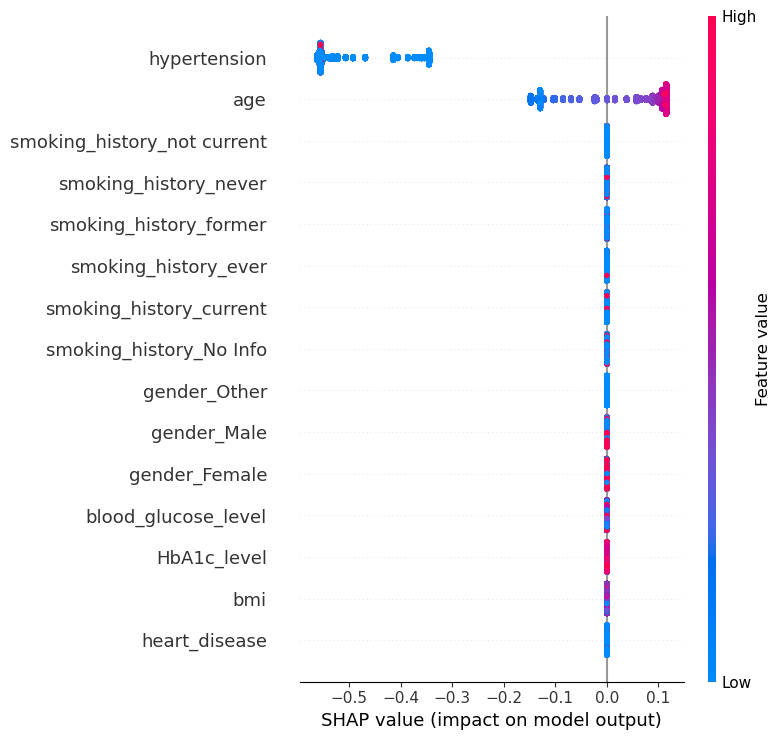

In [132]:
shap.summary_plot(shap_values[:, :, 1], X_test)   


In [133]:
# import joblib


In [134]:
# joblib.dump(model, 'model.pkl')

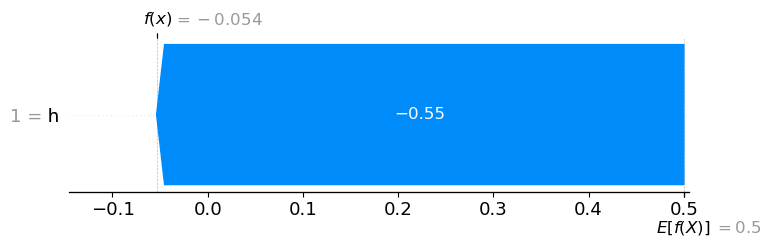

In [135]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Waterfall plot for the first observation
shap.plots.waterfall(shap_values[2:3,1,1])
# shap.plots.waterfall(shap_values[0])


In [136]:
shap.initjs()

shap.plots.force(shap_values[100:2000, :, 1])  